<a href="https://colab.research.google.com/github/eduviana1/TEEP_Chuva_Horaria/blob/main/11_Distribuicoes_Erros_CMORPH_Alertario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
erros = pd.read_csv('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/df_erro_evento.csv')
erros.drop('Unnamed: 0', axis = 1, inplace = True)
erros['DataHora'] = pd.to_datetime(erros['DataHora'], format = '%Y-%m-%d %H:%M:%S')
erros.head()

,DataHora,alto_da_boa_vista,anchieta,av_brasil_mendanha,bangu,barrinha,campo_grande,cidade_de_deus,copacabana,grajau,...,santa_cruz,santa_teresa,sao_cristovao,saude,sepetiba,tanque,tijuca,tijuca_muda,urca,vidigal
0,1998-02-11 01:00:00,-0.677182,-0.04,0.031116,0.16,-0.122759,0.23,0.16,-2.0,-4.54,...,0.23,-0.2,-0.080139,0.0,0.23,0.16,-0.2,-0.003131,-3.0,0.0
1,1998-02-11 02:00:00,-0.227579,0.12,0.091215,0.12,-0.091886,0.20,0.12,-1.5,0.12,...,0.20,0.0,-0.105111,-0.5,0.20,0.12,-0.5,-0.109520,-0.2,0.0
2,1998-02-11 03:00:00,0.090000,0.09,0.120000,0.09,0.040000,0.12,0.09,0.0,0.09,...,0.12,0.0,0.000000,0.0,0.12,0.09,0.0,0.000000,0.0,0.0
3,1998-02-11 04:00:00,0.050000,-0.15,-0.042209,0.05,-0.135493,0.17,0.05,0.0,0.05,...,-0.23,0.0,-0.207581,0.0,-1.03,0.05,0.0,-0.219901,0.0,0.0
4,1998-02-11 05:00:00,-0.625378,-5.66,-0.876305,0.04,-0.877601,0.09,0.04,0.0,-0.46,...,0.09,-0.4,-0.970935,-1.1,-2.81,0.04,-0.2,-0.928126,-0.4,0.0


<ipython-input-23-185fbf3ebaeb>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


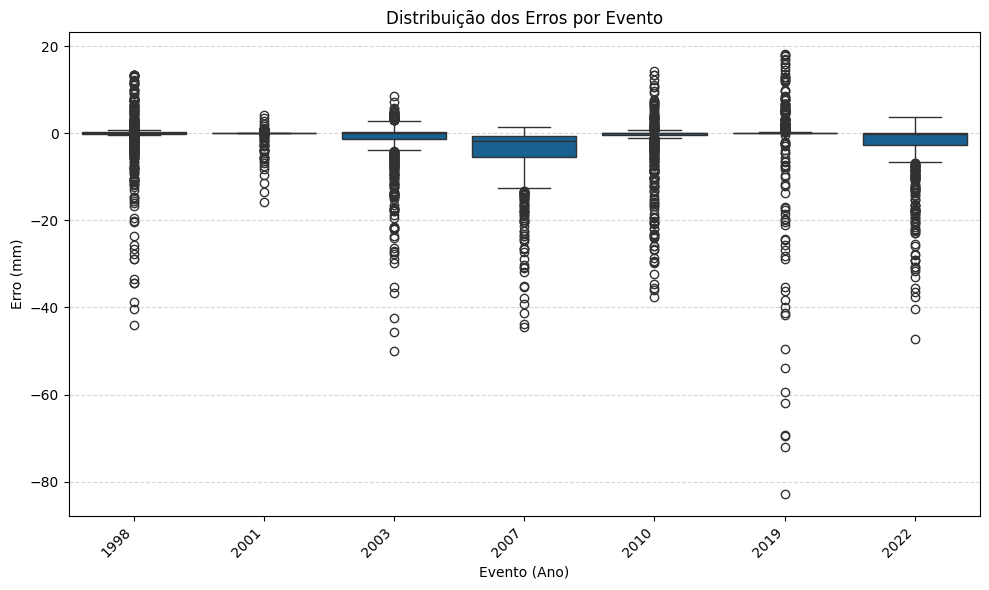

In [ ]:
# Adiciona coluna do ano como 'evento'
eventos = erros.copy()
eventos['evento'] = eventos['DataHora'].dt.year

# Remove a coluna DataHora para focar nas estações
eventos_long = eventos.drop('DataHora', axis=1).melt(id_vars='evento', var_name='Estacao', value_name='Erro')

# Plotagem do boxplot
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=eventos_long, x='evento', y='Erro', color='#0465a4')

ax.set_title('Distribuição dos Erros por Evento')
ax.set_xlabel('Evento (Ano)')
ax.set_ylabel('Erro (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

fig.tight_layout()
fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Distribuição dos Erros por Evento.jpg', dpi=300)


<ipython-input-22-ef0f7d367e87>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


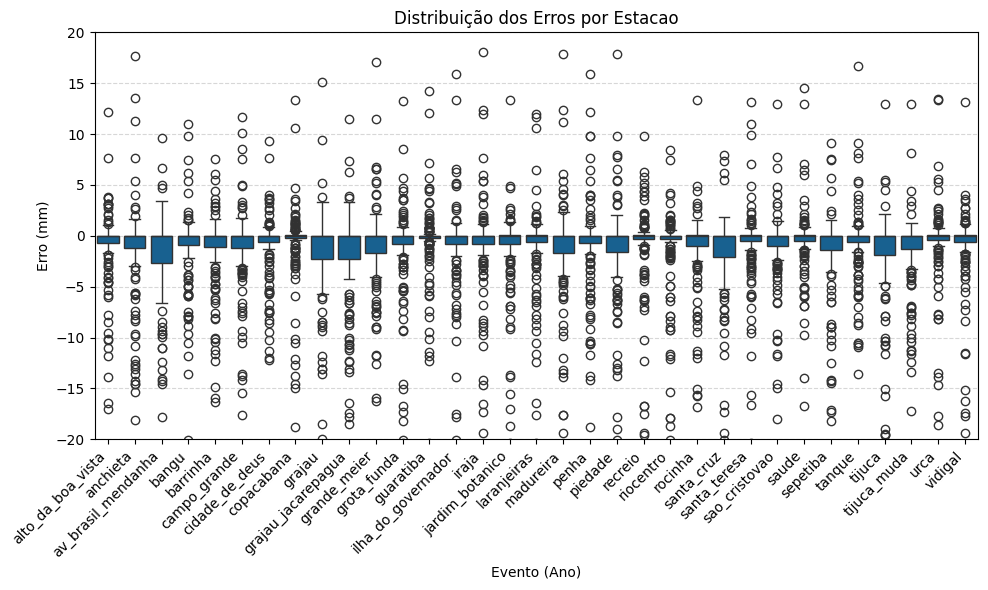

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adiciona a coluna 'evento' como o ano (se quiser manter essa info)
eventos = erros.copy()
eventos['evento'] = eventos['DataHora'].dt.year

# Transforma o dataframe para formato long
eventos_long = eventos.drop('DataHora', axis=1).melt(id_vars='evento', var_name='Estacao', value_name='Erro')

# Plotando Boxplot
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=eventos_long, x='Estacao', y='Erro', color='#0465a4')
ax.set_title('Distribuição dos Erros por Estacao')
ax.set_xlabel('Evento (Ano)')
ax.set_ylabel('Erro (mm)')
ax.set_ylim(-20,20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()
fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Distribuição dos Erros por Estacao.jpg', dpi=300)

In [ ]:
# Adiciona coluna do ano como 'evento'
eventos = erros.copy()
eventos['evento'] = eventos['DataHora'].dt.year
# Remove a coluna DataHora para focar nas estações
eventos_long = eventos.drop('DataHora', axis=1).melt(id_vars='evento', var_name='Estacao', value_name='Erro')
eventos_long

,evento,Estacao,Erro
0,1998,alto_da_boa_vista,-0.677182
1,1998,alto_da_boa_vista,-0.227579
2,1998,alto_da_boa_vista,0.090000
3,1998,alto_da_boa_vista,0.050000
4,1998,alto_da_boa_vista,-0.625378
...,...,...,...
5539,2022,vidigal,0.090000
5540,2022,vidigal,0.000000
5541,2022,vidigal,0.000000
5542,2022,vidigal,0.000000


In [ ]:
erro_medio = eventos_long.groupby(['evento', 'Estacao']).mean()
erro_medio

Erro
evento Estacao                     
1998   alto_da_boa_vista   1.179730
       anchieta           -0.166667
       av_brasil_mendanha -3.267331
       bangu               0.783333
       barrinha           -0.321891
...                             ...
2022   tanque             -3.653750
       tijuca             -0.774583
       tijuca_muda        -1.757917
       urca                0.033750
       vidigal             0.167083

[231 rows x 1 columns]

<ipython-input-39-1701529066>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())


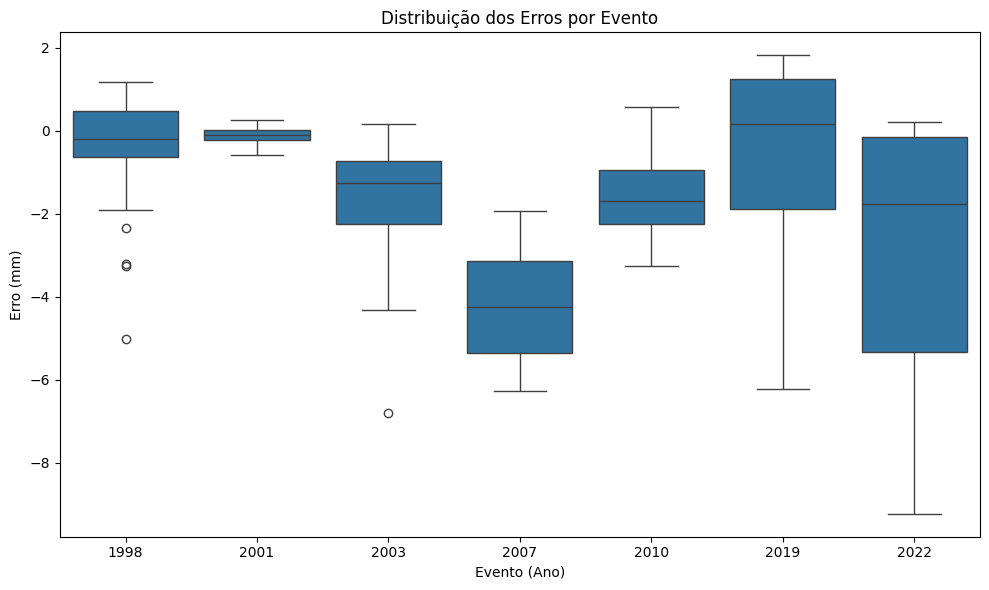

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(erro_medio, x = 'evento', y = 'Erro')

ax.set_title('Distribuição dos Erros por Evento')
ax.set_xlabel('Evento (Ano)')
ax.set_ylabel('Erro (mm)')
ax.set_xticklabels(ax.get_xticklabels())

fig.tight_layout()
fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Distribuição dos Erros por Evento.jpg', dpi=300)

<ipython-input-38-2792235815>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


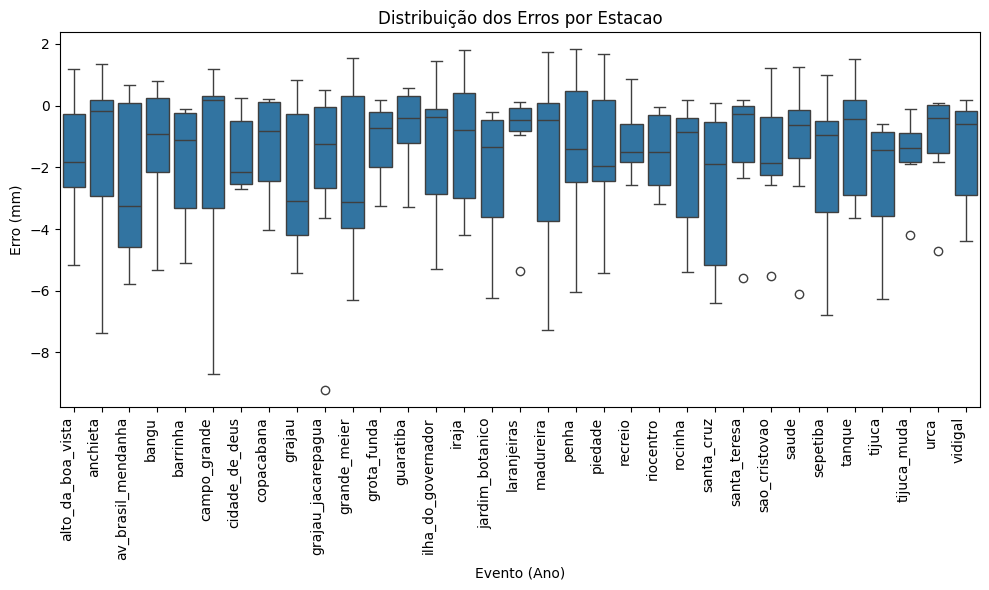

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(erro_medio, x = 'Estacao', y = 'Erro', ax = ax)

ax.set_title('Distribuição dos Erros por Estacao')
ax.set_xlabel('Evento (Ano)')
ax.set_ylabel('Erro (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

fig.tight_layout()
fig.savefig('/content/drive/MyDrive/Grupo 4 - TEEP/Trabalho Prático - Parte II/Figuras/Distribuição dos Erros por Estacao.jpg', dpi=300)